In [1]:
import numpy as np
from scipy.optimize import minimize

# Define your function
def my_function(params, x, k2):
    A, k1 = params
    return A * np.exp(-(k1 - k2) * x)

# Define the loss function to minimize (residuals)
def loss_function(params, x, y_observed, k2):
    y_predicted = my_function(params, x, k2)
    return np.sum((y_observed - y_predicted) ** 2)

# Generate example data
x_data = np.linspace(0, 10, 100)
true_params = [2, 1.5]  # Replace with your actual parameters
k2_value = 0.5  # Replace with your known parameter
y_data_observed = my_function(true_params, x_data, k2_value) + np.random.normal(scale=0.1, size=len(x_data))

# Initial parameter guess
initial_guess = np.zeros_like(true_params)

# Perform fitting using minimize
result = minimize(loss_function, initial_guess, args=(x_data, y_data_observed, k2_value))

# Fitted parameters
fitted_params = result.x

print("True Parameters:", true_params)
print("Fitted Parameters:", fitted_params)

True Parameters: [2, 1.5]
Fitted Parameters: [   2.00745226 1024.98961682]


In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Function to calculate Isoprene values based on ER and k_iso
def calculate_isoprene(params, df, k_acet):
    ER, k_iso = params
    return ER * np.exp(-(k_iso - k_acet) * df['OH_t'])

# Loss function to minimize (residuals)
def loss_function(params, df, k_acet):
    isoprene_predicted = calculate_isoprene(params, df, k_acet)
    return np.sum((df['Isoprene'] - isoprene_predicted) ** 2)

# Example DataFrame
data = {'Isoprene': [1.2, 2.5, 3.1, 4.0, 5.2],
        'Acetylene': [0.5, 0.8, 1.0, 1.2, 1.5],
        'OH_t': [2.0, 2.5, 3.0, 3.5, 4.0]}
df = pd.DataFrame(data)

# Known parameter
k_acet = 0.25e-12

# Initial parameter guess
initial_guess = np.ones(2)

# Perform fitting using minimize
result = minimize(loss_function, initial_guess, args=(df, k_acet))

# Fitted parameters
ER, k_iso = result.x

print("Fitted ER:", ER)
print("Fitted k_iso:", k_iso)


Fitted ER: 0.5137069468885733
Fitted k_iso: -0.5832387981052756


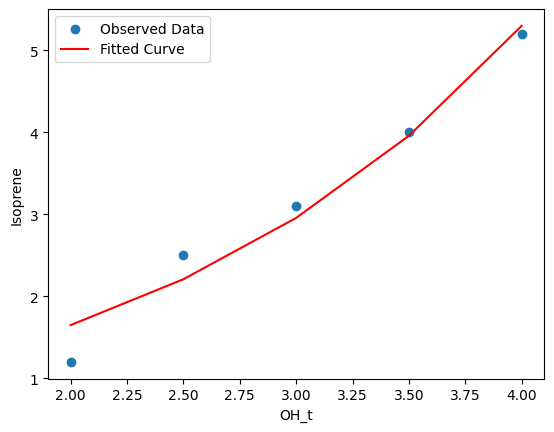

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to calculate Isoprene values based on ER and k_iso
def calculate_isoprene(params, df, k_acet):
    ER, k_iso = params
    return ER * np.exp(-(k_iso - k_acet) * df['OH_t'])

# Loss function to minimize (residuals)
def loss_function(params, df, k_acet):
    isoprene_predicted = calculate_isoprene(params, df, k_acet)
    return np.sum((df['Isoprene'] - isoprene_predicted) ** 2)

# Example DataFrame
data = {'Isoprene': [1.2, 2.5, 3.1, 4.0, 5.2],
        'Acetylene': [0.5, 0.8, 1.0, 1.2, 1.5],
        'OH_t': [2.0, 2.5, 3.0, 3.5, 4.0]}
df = pd.DataFrame(data)

# Known parameter
k_acet = 0.25e-12

# Initial parameter guess
initial_guess = np.ones(2)

# Perform fitting using minimize
result = minimize(loss_function, initial_guess, args=(df, k_acet))

# Fitted parameters
ER, k_iso = result.x

# Plotting
plt.scatter(df['OH_t'], df['Isoprene'], label='Observed Data')
plt.plot(df['OH_t'], calculate_isoprene(result.x, df, k_acet), label='Fitted Curve', color='red')
plt.xlabel('OH_t')
plt.ylabel('Isoprene')
plt.legend()
plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to calculate Isoprene values based on ER and k_iso
def calculate_isoprene(params, df, k_acet):
    ER, k_iso = params
    return ER * np.exp(-(k_iso - k_acet) * df['OH_t'])

# Loss function to minimize (residuals)
def loss_function(params, df, k_acet):
    isoprene_predicted = calculate_isoprene(params, df, k_acet)
    return np.sum((df['Isoprene'] - isoprene_predicted) ** 2)

# Jacobian matrix calculation for standard errors
def calculate_jacobian(params, func, args):
    eps = 1e-8
    n = len(params)
    jac = np.zeros((len(args), n))
    
    for i in range(n):
        perturbation = np.zeros_like(params)
        perturbation[i] = eps * (1 + np.abs(params[i]))
        jac[:, i] = (func(params + perturbation, *args) - func(params - perturbation, *args)) / (2 * perturbation[i])
    
    return jac

# Example DataFrame
data = {'Isoprene': [1.2, 2.5, 3.1, 4.0, 5.2],
        'Acetylene': [0.5, 0.8, 1.0, 1.2, 1.5],
        'OH_t': [2.0, 2.5, 3.0, 3.5, 4.0]}
df = pd.DataFrame(data)

# Known parameter
k_acet = 0.25e-12

# Initial parameter guess
initial_guess = np.ones(2)

# Perform fitting using minimize with 'Nelder-Mead' method
result = minimize(loss_function, initial_guess, args=(df, k_acet), method='Nelder-Mead')

# Fitted parameters
ER, k_iso = result.x

# Calculate standard errors for the parameters
jac = calculate_jacobian(result.x, calculate_isoprene, (df, k_acet))
cov_matrix = np.linalg.inv(jac.T @ jac)
std_errors = np.sqrt(np.diag(cov_matrix))

# Print results
print("Fitted ER:", ER)
print("Standard Error for ER:", std_errors[0])
print("Fitted k_iso:", k_iso)
print("Standard Error for k_iso:", std_errors[1])

# Plotting
plt.scatter(df['OH_t'], df['Isoprene'], label='Observed Data')
plt.plot(df['OH_t'], calculate_isoprene(result.x, df, k_acet), label='Fitted Curve', color='red')
plt.xlabel('OH_t')
plt.ylabel('Isoprene')
plt.legend()
plt.show()


ValueError: could not broadcast input array from shape (5,) into shape (2,)